In [1]:
import pandas as pd

## DATA OBSERVATION

In [2]:
df = pd.read_csv("../database/data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
df.info()               #A LOT FEATURES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [8]:
df['Bankrupt?'].value_counts()              #DISBALANCED DISTRIBUTION VALUES

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [10]:
df.isna().sum().value_counts()              #NO NULL VALUES

0    96
dtype: int64

In [15]:
df.duplicated().sum()                       #NO DUPLICATED VALUES

0

### DATA VISUALIZATION

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

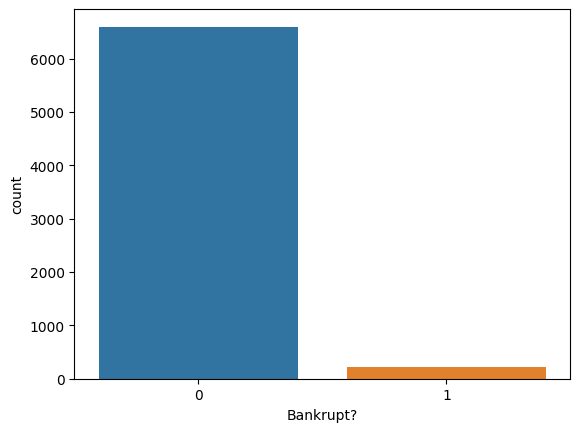

In [14]:
sns.countplot(x=df['Bankrupt?'])
plt.show()

- There is imbalance in the output value, we are going to oversampling that
- Because there are too many features (95) and make plots for each one takes a lot of time, I will pass

### OVERSAMPLING

In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
sm = SMOTE()

x = df.drop(columns=['Bankrupt?'], axis=1)
y = df['Bankrupt?']

x,y = sm.fit_resample(x,y)

In [5]:
y.value_counts()                            #NOW, TARGET VALUE IS BALANCED

1    6599
0    6599
Name: Bankrupt?, dtype: int64

### FEATURE SELECTION

In [6]:
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest

feature_selection=SelectKBest(f_classif,k=20).fit(x,y)

d:\AnalisisDatos\Portfolio\Company-Bankruptcy\env\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [93] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
d:\AnalisisDatos\Portfolio\Company-Bankruptcy\env\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [7]:
x_newfeat = x[x.columns[feature_selection.get_support()]]

In [23]:
x_newfeat.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Debt ratio %,Net worth/Assets,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Cash/Total Assets,Current Liability to Assets,Retained Earnings to Total Assets,Current Liability to Current Assets,Net Income to Total Assets
0,0.370594,0.424389,0.405750,0.0,0.147950,0.147950,0.147950,0.169141,0.095921,0.138736,0.207576,0.792424,0.095885,0.137757,0.672775,0.004094,0.147308,0.903225,0.118250,0.716845
1,0.464291,0.538214,0.516730,0.0,0.182251,0.182251,0.182251,0.208944,0.093722,0.169918,0.171176,0.828824,0.093743,0.168962,0.751111,0.014948,0.056963,0.931065,0.047775,0.795297
2,0.426071,0.499019,0.472295,0.0,0.177911,0.177911,0.193713,0.180581,0.092338,0.142803,0.207516,0.792484,0.092318,0.148036,0.829502,0.000991,0.098162,0.909903,0.025346,0.774670
3,0.399844,0.451265,0.457733,0.0,0.154187,0.154187,0.154187,0.193722,0.077762,0.148603,0.151465,0.848535,0.077727,0.147561,0.725754,0.018851,0.098715,0.906902,0.067250,0.739555
4,0.465022,0.538432,0.522298,0.0,0.167502,0.167502,0.167502,0.212537,0.096898,0.168412,0.106509,0.893491,0.096927,0.167461,0.751822,0.014161,0.110195,0.913850,0.047725,0.795016


In [24]:
#CHANGE COLUMN NAMES FOR EASIER DEPLOYMENT
column_names = ["val_1", "val_2", "val_3", "val_4", "val_5","val_6", "val_7", "val_8", "val_9", "val_10",
                "val_11", "val_12", "val_13", "val_14", "val_15","val_16", "val_17", "val_18", "val_19", "val_20"]

x_newfeat.columns = column_names
x_newfeat.head()

,val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,val_9,val_10,val_11,val_12,val_13,val_14,val_15,val_16,val_17,val_18,val_19,val_20
0,0.370594,0.424389,0.405750,0.0,0.147950,0.147950,0.147950,0.169141,0.095921,0.138736,0.207576,0.792424,0.095885,0.137757,0.672775,0.004094,0.147308,0.903225,0.118250,0.716845
1,0.464291,0.538214,0.516730,0.0,0.182251,0.182251,0.182251,0.208944,0.093722,0.169918,0.171176,0.828824,0.093743,0.168962,0.751111,0.014948,0.056963,0.931065,0.047775,0.795297
2,0.426071,0.499019,0.472295,0.0,0.177911,0.177911,0.193713,0.180581,0.092338,0.142803,0.207516,0.792484,0.092318,0.148036,0.829502,0.000991,0.098162,0.909903,0.025346,0.774670
3,0.399844,0.451265,0.457733,0.0,0.154187,0.154187,0.154187,0.193722,0.077762,0.148603,0.151465,0.848535,0.077727,0.147561,0.725754,0.018851,0.098715,0.906902,0.067250,0.739555
4,0.465022,0.538432,0.522298,0.0,0.167502,0.167502,0.167502,0.212537,0.096898,0.168412,0.106509,0.893491,0.096927,0.167461,0.751822,0.014161,0.110195,0.913850,0.047725,0.795016


I chose 20 features of 95 and store in x_newfeat, because those features have more correlation with target value than others.

### SPLIT DATA

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_newfeat, y, test_size=0.2)

## MODELS

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### LOGISTIC REGRESSION

In [84]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_predict = lr_model.predict(x_test)

print(accuracy_score(y_test, lr_predict))

0.8799242424242424


In [85]:
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1312
           1       0.87      0.89      0.88      1328

    accuracy                           0.88      2640
   macro avg       0.88      0.88      0.88      2640
weighted avg       0.88      0.88      0.88      2640



In [86]:
confusion_matrix(y_test, lr_predict)

array([[1138,  174],
       [ 143, 1185]], dtype=int64)

### RANDOM FOREST

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_predict = rf_model.predict(x_test)

print(accuracy_score(y_test, rf_predict))

0.9598484848484848


In [89]:
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1312
           1       0.94      0.98      0.96      1328

    accuracy                           0.96      2640
   macro avg       0.96      0.96      0.96      2640
weighted avg       0.96      0.96      0.96      2640



In [90]:
confusion_matrix(y_test, rf_predict)

array([[1227,   85],
       [  21, 1307]], dtype=int64)

### XGBOOST

In [28]:
from xgboost import XGBClassifier

In [29]:
xg_model = XGBClassifier(n_estimators=50, max_depth=6, learning_rate=1, objective='binary:logistic')
xg_model.fit(x_train, y_train)
xg_predict = xg_model.predict(x_test)

print(accuracy_score(y_test, xg_predict))

0.9621212121212122


In [30]:
print(classification_report(y_test, xg_predict))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1320
           1       0.95      0.98      0.96      1320

    accuracy                           0.96      2640
   macro avg       0.96      0.96      0.96      2640
weighted avg       0.96      0.96      0.96      2640



In [31]:
confusion_matrix(y_test, xg_predict)

array([[1249,   71],
       [  29, 1291]], dtype=int64)

- XGBOOST present better results than others, thus I will use this ML model to wrap into a API service
- Hypertunning will be an optional step, but I assume XGBOOST metrics is good enough to use it

### EXPORT MODEL

In [32]:
import pickle

In [33]:
pickle.dump(xg_model,open('../ml_model/model.pkl','wb'))

In [22]:
x_newfeat.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Debt ratio %,Net worth/Assets,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Cash/Total Assets,Current Liability to Assets,Retained Earnings to Total Assets,Current Liability to Current Assets,Net Income to Total Assets
0,0.370594,0.424389,0.405750,0.0,0.147950,0.147950,0.147950,0.169141,0.095921,0.138736,0.207576,0.792424,0.095885,0.137757,0.672775,0.004094,0.147308,0.903225,0.118250,0.716845
1,0.464291,0.538214,0.516730,0.0,0.182251,0.182251,0.182251,0.208944,0.093722,0.169918,0.171176,0.828824,0.093743,0.168962,0.751111,0.014948,0.056963,0.931065,0.047775,0.795297
2,0.426071,0.499019,0.472295,0.0,0.177911,0.177911,0.193713,0.180581,0.092338,0.142803,0.207516,0.792484,0.092318,0.148036,0.829502,0.000991,0.098162,0.909903,0.025346,0.774670
3,0.399844,0.451265,0.457733,0.0,0.154187,0.154187,0.154187,0.193722,0.077762,0.148603,0.151465,0.848535,0.077727,0.147561,0.725754,0.018851,0.098715,0.906902,0.067250,0.739555
4,0.465022,0.538432,0.522298,0.0,0.167502,0.167502,0.167502,0.212537,0.096898,0.168412,0.106509,0.893491,0.096927,0.167461,0.751822,0.014161,0.110195,0.913850,0.047725,0.795016
